In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

df = pd.read_csv('/content/Labelled Yelp Dataset.csv')
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,User_id,Product_id,Rating,Date,Review,Label
0,923,0,3,12-08-2014,The food at snack is a selection of popular Gr...,-1
1,924,0,3,5/16/2013,This little place in Soho is wonderful. I had ...,-1
2,925,0,4,07-01-2013,ordered lunch for 15 from Snack last Friday. Â...,-1
3,926,0,4,7/28/2011,This is a beautiful quaint little restaurant o...,-1
4,927,0,4,11-01-2010,Snack is great place for a Â casual sit down l...,-1


In [ ]:
df.isnull().sum()

User_id       0
Product_id    0
Rating        0
Date          0
Review        0
Label         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User_id     932 non-null    int64 
 1   Product_id  932 non-null    int64 
 2   Rating      932 non-null    int64 
 3   Date        932 non-null    object
 4   Review      932 non-null    object
 5   Label       932 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 43.8+ KB


In [ ]:
df.describe()

,User_id,Product_id,Rating,Label
count,932.000000,932.000000,932.000000,932.000000
mean,1386.083691,2.221030,4.111588,0.781116
std,268.515927,1.717562,0.931831,0.624721
min,923.000000,0.000000,1.000000,-1.000000
25%,1153.750000,1.000000,4.000000,1.000000
50%,1385.500000,3.000000,4.000000,1.000000
75%,1618.250000,4.000000,5.000000,1.000000
max,1851.000000,4.000000,5.000000,1.000000


In [ ]:
df['Rating'].value_counts()

4    407
5    357
3    103
2     45
1     20
Name: Rating, dtype: int64

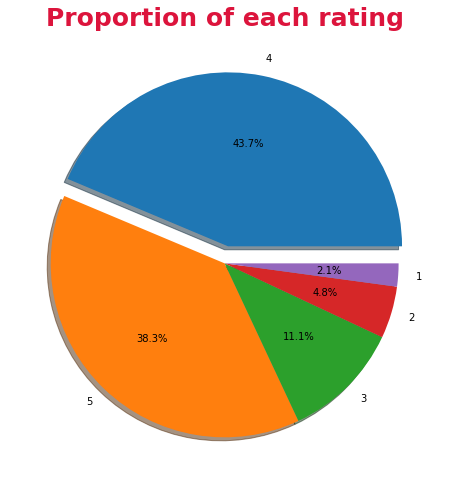

In [ ]:
plt.figure(figsize=(15,8))
labels = df['Rating'].value_counts().keys()
values = df['Rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [ ]:
# the complete process to import nltk - have used the simple version below!
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp

True

In [ ]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df['Review'][0], clean_text(df['Review'][0])

("The food at snack is a selection of popular Greek dishes. The appetizer tray is good as is the Greek salad. We were underwhelmed with the main courses. There are 4-5 tables here so it's sometimes hard to get seated.",
 'food snack selection popular Greek dishes appetizer tray good Greek salad underwhelmed main courses 45 tables sometimes hard get seated')

In [ ]:
df['Review'].head().apply(clean_text)

0    food snack selection popular Greek dishes appe...
1    little place Soho wonderful lamb sandwich glas...
2    ordered lunch 15 Snack last Friday Â time noth...
3    beautiful quaint little restaurant pretty stre...
4    Snack great place Â casual sit lunch especiall...
Name: Review, dtype: object

In [ ]:
df.shape

(932, 6)

In [ ]:
df['Review'] = df['Review'].astype(str)

In [ ]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
preprocess(df['Review'][4])

"Snack great place Â casual sit lunch- especially cold winter day Â In many ways restaurant mirrors food- simple yet unique Â The avgolemono soup lemony perfection butter bean salad hearty yet light Â The greek coffee different ... sweeten honey makes interesting thickness sweet spice I definitely plan going back dinner Â If small space n't suit sister restaurant Snack Taverna West Village good better ... `` upscale '' waiters make feel well taken care"

In [ ]:
df['Review'][:10000] = df['Review'][:10000].apply(preprocess)

In [ ]:
df['Review'] = df['Review'].str.lower()

In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['Review'] = df['Review'].apply(lambda x: stem_words(x))

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["Review"] = df["Review"].apply(lambda text: lemmatize_words(text))

In [ ]:
df['Review'].head()

0    the food snack select popular greek dish the a...
1    thi littl place soho wonder i lamb sandwich gl...
2    order lunch snack last friday â on time noth m...
3    thi beauti quaint littl restaur pretti street ...
4    snack great place â casual sit lunch- especi c...
Name: Review, dtype: object

In [ ]:
df.to_csv('Preprocessed Yelp Dataset.csv')

# Preprocessing of data completed here

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('Preprocessed Yelp Dataset.csv')
df.head()

,Unnamed: 0,User_id,Product_id,Rating,Date,Review,Label
0,0,923,0,3,12-08-2014,the food snack select popular greek dish the a...,-1
1,1,924,0,3,5/16/2013,thi littl place soho wonder i lamb sandwich gl...,-1
2,2,925,0,4,07-01-2013,order lunch snack last friday â on time noth m...,-1
3,3,926,0,4,7/28/2011,thi beauti quaint littl restaur pretti street ...,-1
4,4,927,0,4,11-01-2010,snack great place â casual sit lunch- especi c...,-1


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

,User_id,Product_id,Rating,Date,Review,Label
0,923,0,3,12-08-2014,the food snack select popular greek dish the a...,-1
1,924,0,3,5/16/2013,thi littl place soho wonder i lamb sandwich gl...,-1
2,925,0,4,07-01-2013,order lunch snack last friday â on time noth m...,-1
3,926,0,4,7/28/2011,thi beauti quaint littl restaur pretti street ...,-1
4,927,0,4,11-01-2010,snack great place â casual sit lunch- especi c...,-1


In [ ]:
df.dropna(inplace=True)


In [ ]:
df['length'] = df['Review'].apply(len)

In [ ]:
df.info()

In [ ]:
df.groupby('Label').describe()

User_id                                                            \
        count         mean         std    min      25%     50%      75%   
Label                                                                     
-1      102.0  1255.441176  190.717020  923.0  1144.25  1169.5  1454.75   
 1      830.0  1402.138554  272.364784  937.0  1184.25  1399.5  1643.75   

              Product_id            ... Rating      length              \
          max      count      mean  ...    75%  max  count        mean   
Label                               ...                                  
-1     1480.0      102.0  2.127451  ...    5.0  5.0  102.0  295.764706   
 1     1851.0      830.0  2.232530  ...    5.0  5.0  830.0  315.507229   

                                                       
              std   min     25%    50%    75%     max  
Label                                                  
-1     489.058424   5.0  108.75  184.5  354.0  4669.0  
 1     249.767413  13.0  139.25  249.5  414.5  1751.0  

[2 rows x 32 columns]

In [ ]:
df.length.describe()

count     932.000000
mean      313.346567
std       285.542307
min         5.000000
25%       137.000000
50%       242.000000
75%       406.750000
max      4669.000000
Name: length, dtype: float64

In [ ]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x7ff0463f30d0>)

In [ ]:
# (this process took time)
bow_transformer.fit(df['Review'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 4696


In [ ]:
review4 = df['Review'][3]
review4

"thi beauti quaint littl restaur pretti street â if 're stroll soho around lunchtim would great place stop bite i heard review lamb sandwich i tri i 'm happi everi singl ingredi bread onion tomato lamb sauc delici these four star well deserv tasti sandwich great ambianc â i would recommend place anyon"

In [ ]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 252)	1
  (0, 295)	1
  (0, 331)	1
  (0, 460)	1
  (0, 544)	1
  (0, 627)	1
  (0, 1183)	1
  (0, 1210)	1
  (0, 1503)	1
  (0, 1710)	1
  (0, 1916)	2
  (0, 1993)	1
  (0, 2025)	1
  (0, 2210)	1
  (0, 2361)	2
  (0, 2451)	1
  (0, 2497)	1
  (0, 2931)	1
  (0, 3164)	2
  (0, 3252)	1
  (0, 3334)	1
  (0, 3405)	1
  (0, 3475)	1
  (0, 3489)	1
  (0, 3589)	2
  (0, 3603)	1
  (0, 3755)	1
  (0, 3832)	1
  (0, 3945)	1
  (0, 3981)	1
  (0, 3994)	1
  (0, 4000)	1
  (0, 4121)	1
  (0, 4166)	1
  (0, 4227)	1
  (0, 4271)	1
  (0, 4528)	1
  (0, 4620)	2
  (0, 4689)	2
(1, 4696)


In [ ]:
print(bow_transformer.get_feature_names()[3994])
print(bow_transformer.get_feature_names()[4620])

street
would


In [ ]:
# transforming the review - (this process took time)
bow_reviews = bow_transformer.transform(df['Review'])

In [ ]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (932, 4696)
Amount of non zero values in the bag of words model: 38291


In [ ]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.87


In [ ]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 252)	1
  (0, 295)	1
  (0, 331)	1
  (0, 460)	1
  (0, 544)	1
  (0, 627)	1
  (0, 1183)	1
  (0, 1210)	1
  (0, 1503)	1
  (0, 1710)	1
  (0, 1916)	2
  (0, 1993)	1
  (0, 2025)	1
  (0, 2210)	1
  (0, 2361)	2
  (0, 2451)	1
  (0, 2497)	1
  (0, 2931)	1
  (0, 3164)	2
  (0, 3252)	1
  (0, 3334)	1
  (0, 3405)	1
  (0, 3475)	1
  (0, 3489)	1
  (0, 3589)	2
  (0, 3603)	1
  (0, 3755)	1
  (0, 3832)	1
  (0, 3945)	1
  (0, 3981)	1
  (0, 3994)	1
  (0, 4000)	1
  (0, 4121)	1
  (0, 4166)	1
  (0, 4227)	1
  (0, 4271)	1
  (0, 4528)	1
  (0, 4620)	2
  (0, 4689)	2


In [ ]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['street']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['would']])

4.893966221680904
2.656621650555259


In [ ]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

# process of feature extraction ended

Shape: (932, 4696)
No. of Dimensions: 2


In [ ]:
#training and testing data
review_train, review_test, label_train, label_test = train_test_split(df['Review'],df['Label'],test_size=0.35)

In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [ ]:
pipeline.fit(review_train,label_train)
# this took time

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ff0463f30d0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(review_test)
predictions
#

In [ ]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        39
           1       0.88      1.00      0.94       288

    accuracy                           0.88       327
   macro avg       0.44      0.50      0.47       327
weighted avg       0.78      0.88      0.82       327

Confusion Matrix: [[  0  39]
 [  0 288]]
Accuracy Score: 0.8807339449541285


In [ ]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 88.07%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [ ]:
pipeline.fit(review_train,label_train)
#

In [ ]:
rfc_pred = pipeline.predict(review_test)
rfc_pred
# took 1m36s

In [ ]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        39
           1       0.88      1.00      0.94       288

    accuracy                           0.88       327
   macro avg       0.44      0.50      0.47       327
weighted avg       0.78      0.88      0.82       327

Confusion Matrix: [[  0  39]
 [  0 288]]
Accuracy Score: 0.8807339449541285
Model Prediction Accuracy: 88.07%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [ ]:
pipeline.fit(review_train,label_train)
#2m11s

In [ ]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

In [ ]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          -1       0.09      0.10      0.09        39
           1       0.88      0.85      0.86       288

    accuracy                           0.76       327
   macro avg       0.48      0.48      0.48       327
weighted avg       0.78      0.76      0.77       327

Confusion Matrix: [[  4  35]
 [ 42 246]]
Accuracy Score: 0.764525993883792
Model Prediction Accuracy: 76.45%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [ ]:
pipeline.fit(review_train,label_train)
#1m57s

In [ ]:
knn_pred = pipeline.predict(review_test)
knn_pred

In [ ]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          -1       0.10      0.18      0.13        39
           1       0.88      0.79      0.83       288

    accuracy                           0.72       327
   macro avg       0.49      0.49      0.48       327
weighted avg       0.78      0.72      0.75       327

Confusion Matrix: [[  7  32]
 [ 60 228]]
Accuracy Score: 0.7186544342507645
Model Prediction Accuracy: 71.87%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [ ]:
pipeline.fit(review_train,label_train)
#9m

In [ ]:
svc_pred = pipeline.predict(review_test)
svc_pred

In [ ]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        39
           1       0.88      1.00      0.94       288

    accuracy                           0.88       327
   macro avg       0.44      0.50      0.47       327
weighted avg       0.78      0.88      0.82       327

Confusion Matrix: [[  0  39]
 [  0 288]]
Accuracy Score: 0.8807339449541285
Model Prediction Accuracy: 88.07%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [ ]:
pipeline.fit(review_train,label_train)

In [ ]:
lr_pred = pipeline.predict(review_test)
lr_pred

In [ ]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        39
           1       0.88      1.00      0.94       288

    accuracy                           0.88       327
   macro avg       0.44      0.50      0.47       327
weighted avg       0.78      0.88      0.82       327

Confusion Matrix: [[  0  39]
 [  0 288]]
Accuracy Score: 0.8807339449541285
Model Prediction Accuracy: 88.07%


In [ ]:
#final output
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 88.07%
K Nearest Neighbors Prediction Accuracy: 71.87%
Decision Tree Classifier Prediction Accuracy: 76.45%
Random Forests Classifier Prediction Accuracy: 88.07%
Support Vector Machines Prediction Accuracy: 88.07%
Multinomial Naive Bayes Prediction Accuracy: 88.07%
